# Overview

The purpose of this study was to determine the impact of AI generated content on US TV screenplays. Transcripts of US primetime, daytime and late-night comedy episodes were collected. After cleaning and filtering, 4K records were processed through [Originality AI](https://originality.ai/)'s Detection model. Visual and statistical analysis was carried out on the data, and conclusions drawn from the observations.


In [1]:
# import custom helper functions
# also imports the usual package libraries like pandas, numpy, etc
from helperfiles import *

# The Data

Almost 6K records of raw data was collected, and cleaned: duplicate, invalid and incomplete records were removed. The data was further filtered through the date window of 2020 to 2023. 4K records remained to be processed through [Originality.ai](https://originality.ai/)'s state-of-the-art AI detector to provide viable data for analysis. 

In [2]:
df = get_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4185 entries, 668 to 940
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       4185 non-null   int64  
 1   genre      4185 non-null   object 
 2   aiContent  4185 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 130.8+ KB


In [3]:
# view a random sample of the dataset
df.sample(n=5, random_state = 0)

,year,genre,aiContent
727,2022,LateNight Comedy,0.0051
769,2023,Daytime Soap,0.1133
216,2020,LateNight Comedy,0.0001
2775,2021,Daytime Soap,0.0004
831,2021,Primetime Pilot,0.0017


# Volume and Distribution of AI Content

The volume and distribution of AI Content is analyzed across years and genres, using both visualization techniques and statistical analysis.

## Visualization of `aiContent`

genre,Daytime Soap,LateNight Comedy,Primetime Pilot
year,,,
2020,0.013106,0.008488,0.001969
2021,0.014077,0.002187,0.006765
2022,0.028327,0.002558,0.008396
2023,0.045213,0.002737,0.002069


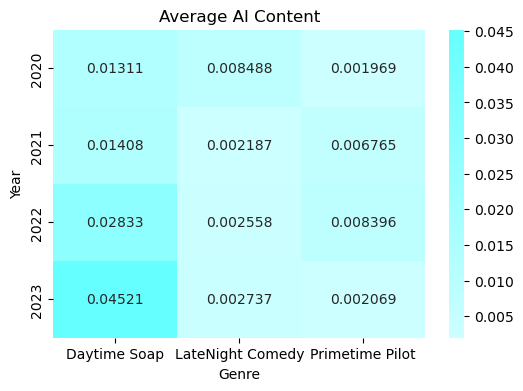

In [4]:
# Distribution of averages across genre and years
# create a pivot table of aiContent vs year and genre
dt = df.groupby(['year', 'genre']).aiContent.mean().to_frame()
df_pivot = dt.reset_index().pivot(index='year',
                    columns='genre', values='aiContent')
display(df_pivot)

plt.figure(figsize=(6,4))
custom_cmap = get_custom_cmap('aiContent') # get custom color map for pivot table
sns.heatmap(df_pivot, annot=True, cmap=custom_cmap, fmt= '.4g',)
plt.xlabel('Genre')
plt.ylabel('Year')
plt.title('Average AI Content')
plt.show()

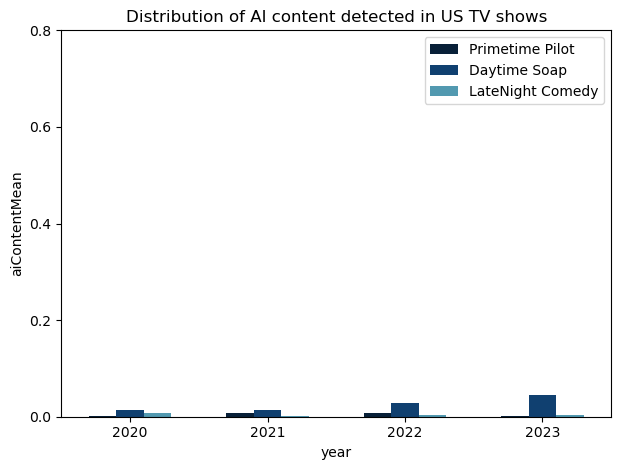

In [5]:
# visual analysis of aiContent distribution - barplot

# using groupby to determine the mean across genre and year
ai_content_mean = df.groupby(['genre', 'year']).aiContent.mean().reset_index()

df = df.merge(ai_content_mean,
              on=['genre', 'year'],
             suffixes=('','Mean'))

# plotting the bargraph
sns.barplot(data=df,
            x='year',
            y='aiContentMean',
            hue='genre',
            palette="ocean",
           width=0.6)
plt.title('Distribution of AI content detected in US TV shows')
plt.legend(loc='best')
plt.tight_layout()
plt.yticks(np.arange(0,1,0.2))
plt.show()

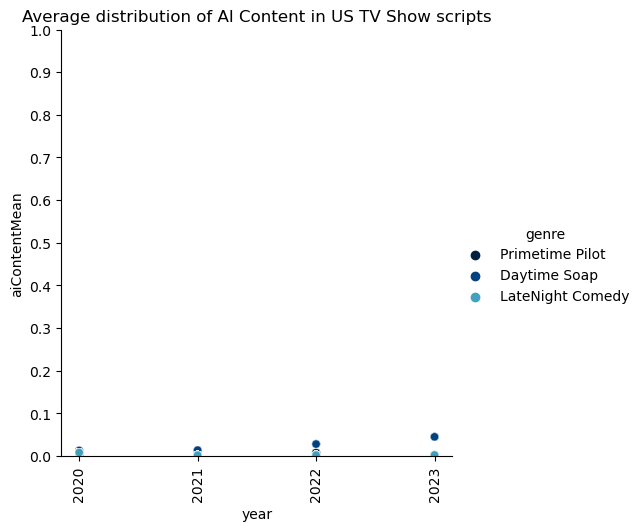

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.relplot(data=df,
           x='year',
           y='aiContentMean',
           hue='genre',
           palette="ocean",
           alpha=0.3)
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(rotation=90);
plt.xticks(range(2020,2024))
plt.title('Average distribution of AI Content in US TV Show scripts')
plt.show()

## Visualization of `originalContent`

Due to the extremely low values of aiContent, it would be helpful to study the original (i.e. human) content.

In [7]:
df['originalContent'] = 1 - df.aiContent

genre,Daytime Soap,LateNight Comedy,Primetime Pilot
year,,,
2020,0.986894,0.991512,0.998031
2021,0.985923,0.997813,0.993235
2022,0.971673,0.997442,0.991604
2023,0.954787,0.997263,0.997931


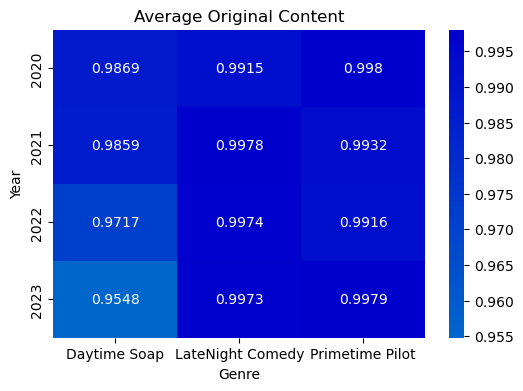

In [8]:
# Distribution of averages across genre and years

dt = df.groupby(['year', 'genre']).originalContent.mean().to_frame()
df_pivot = dt.reset_index().pivot(index='year',
                    columns='genre', values='originalContent')
display(df_pivot)


plt.figure(figsize=(6,4))
custom_cmap = get_custom_cmap('originalContent') # get custom color map for pivot table
sns.heatmap(df_pivot, annot=True, cmap=custom_cmap, fmt= '.4g',)
plt.xlabel('Genre')
plt.ylabel('Year')
plt.title('Average Original Content')
plt.show()

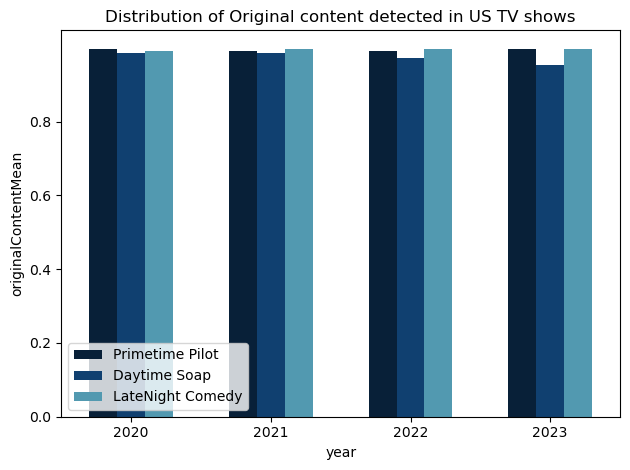

In [9]:
# visual analysis of aiContent distribution

original_content_mean = df.groupby(['genre', 'year']).originalContent.mean().reset_index()

df = df.merge(original_content_mean,
              on=['genre', 'year'],
             suffixes=('','Mean'))


sns.barplot(data=df,
            x='year',
            y='originalContentMean',
            hue='genre',
            palette="ocean",
           width=0.6)
plt.title('Distribution of Original content detected in US TV shows')
plt.legend(loc='best')
plt.tight_layout()
plt.yticks(np.arange(0,1,0.2))
plt.show()

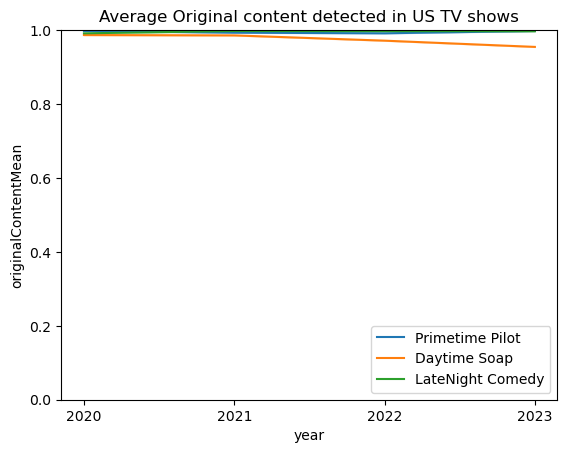

In [10]:
# visualizing with a line graph
for genre in df.genre.unique():
    sns.lineplot(x='year',
                y='originalContentMean',
                data=df[df.genre==genre],
                label=genre)
plt.legend(loc='lower right')
plt.title('Average Original content detected in US TV shows')
plt.yticks(np.arange(0,1.2,0.2))
plt.xticks(range(2020,2024));
plt.show()

## Statistical Analysis

In [11]:
# calculating the mean and standard deviation of the aiContent

print(f"The mean of the probability of aiContent: {df.aiContent.values.mean()*100:.3f}%.")
print(f"The mean of the probability of original (human) Content: {df.originalContent.values.mean()*100:.3f}%.")
print(f"The standard deviation: {df.originalContent.values.std():.3f}.") # same for both as originalContent = 1 -aiContent
# print(f"The standard deviation: {df.aiContent.values.std():.3f}.")


The mean of the probability of aiContent: 1.925%.
The mean of the probability of original (human) Content: 98.075%.
The standard deviation: 0.053.


## Summary of Findings

Visual and statistical analysis clearly indicate that that there's a negligible probability of AI Content throughout the acquired dataset.

# Analyzing the trend of AI Content from yearly distributions

Testing for changes in the distribution of `aiContent` is useful way to check if there's been any growth over the time period. 

## Process
1. Visual analysis of histograms, grouped by years.
2. Statistical analysis of the distributions with the F-ANOVA (analysis of variance test)

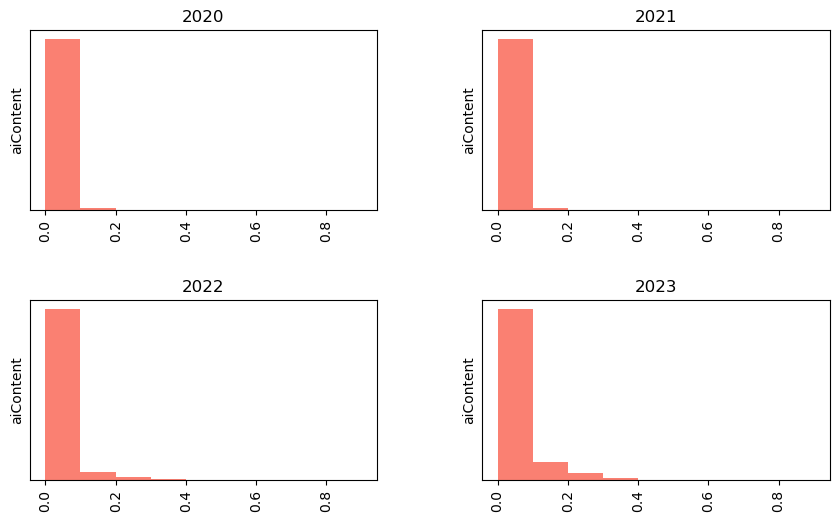

In [12]:
# 1. visual analysis with histograms
bins = np.arange(0,1.0,0.1) # using constant bin sizes
hist = df.hist(column='aiContent', by='year', bins=bins, figsize=(10, 6), color='salmon')

for ax in hist.flatten():
    ax.set_yticks([])
    ax.set_ylabel("aiContent")
plt.show()

## Observation 

There is a slight variation between the distributions. The F-ANOVA will determine if this variation is statistically significant. ANOVA tests against the Null Hypothesis that the distributions are the same i.e. have the same mean and the same standard deviation.

In [13]:
# 2. statistical analysis with f-ANOVA
import scipy.stats as stats
import numpy as np
bins = np.arange(0,1.0,0.1)

yr20s = []
for year in [2020, 2021, 2022, 2023]:
    tmp = df[df.year==year].aiContent
    # create a frequency distribution table of each year's distribution
    yr20s.append(np.histogram(tmp, bins=bins)[0])
statistic, p_value = stats.f_oneway(*yr20s)
print(p_value)
print ("The null hypothesis is",
       "rejected. The distributions are NOT the same." if p_value<0.05 else "NOT rejected. The distributions ARE the same.")



0.9811621752163516
The null hypothesis is NOT rejected. The distributions ARE the same.


## Conclusion

The statistical test confirms that the distributions are the same and there's no significant change in the trend of aiContent.

# Appendix 

## Credit

The transcripts were collected from the following fan-hosted websites:

* https://tvmeg.com/ - for Daytime Soap Operas
* https://snltranscripts.jt.org - for SNL Sketches
* https://sites.google.com/site/tvwriting/us-drama/pilot-scripts - for US Drama/Comedy Pilots

Thank you.
